In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import gym
from IPython import display

In [3]:
gym.make('Pong-v0').unwrapped.get_action_meanings()

['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

In [4]:
env= gym.make('Pendulum-v0').unwrapped
env.action_space.sample()

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


array([1.5900759], dtype=float32)

In [5]:
env.action_space.sample(), type(env.action_space.sample())

(array([0.01413903], dtype=float32), numpy.ndarray)

In [6]:
env.action_space.high, env.action_space.low

(array([2.], dtype=float32), array([-2.], dtype=float32))

In [7]:
env = gym.make('CartPole-v0').unwrapped
env.action_space.sample(), type(env.action_space.sample()), type(env.action_space)

(1, int, gym.spaces.discrete.Discrete)

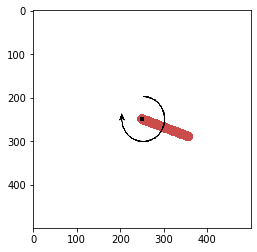

In [8]:
game = 'Pendulum-v0'

env = gym.make(game)
env.reset()

for i in range(25):
   plt.imshow(env.render(mode='rgb_array'))
   display.display(plt.gcf())    
   display.clear_output(wait=True)
   observation, reward, done, info = env.step(env.action_space.sample()) # take a random action
   if done:
    break

env.close()

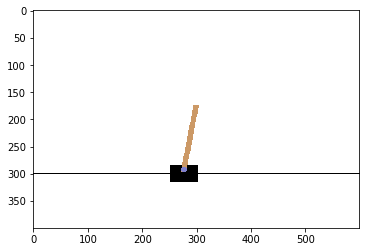

In [9]:
env = gym.make('CartPole-v0')
env.reset()

for i in range(25):
   plt.imshow(env.render(mode='rgb_array'))
   display.display(plt.gcf())    
   display.clear_output(wait=True)
   observation, reward, done, info = env.step(env.action_space.sample()) # take a random action
   if done:
    break

env.close()

In [10]:
import gym
import io
import base64
from IPython.display import HTML
from gym import wrappers


env = gym.make('SpaceInvaders-v0')
print(env.action_space.sample())
# env = gym.make('CartPole-v0')
env = wrappers.Monitor(env, "/tmp/gym-results", force=True)
env.reset()
for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done: break
env.close()

video = io.open('/tmp/gym-results/openaigym.video.%s.video000000.mp4' % env.file_infix, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''
    <video width="360" height="auto" alt="test" controls><source src="data:video/mp4;base64,{0}" type="video/mp4" /></video>'''
.format(encoded.decode('ascii')))

1


In [11]:
import gym
from gym import wrappers

env = gym.make("SpaceInvaders-v0")
env = wrappers.Monitor(env, "/tmp/SpaceInvaders-v0", force=True)

for episode in range(2):
    observation = env.reset()
    step = 0
    total_reward = 0

    while True:
        step += 1
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        total_reward += reward
        if done:
            print("Episode: {0},\tSteps: {1},\tscore: {2}"
                  .format(episode, step, total_reward)
            )
            break
            
vfile = "/tmp/SpaceInvaders-v0/openaigym.video.%s.video000000.mp4" % env.file_infix
env.close()

Episode: 0,	Steps: 655,	score: 135.0
Episode: 1,	Steps: 792,	score: 150.0


In [12]:
import os
import io
import base64
from IPython.display import display, HTML

def ipython_show_video(path):
    """Show a video at `path` within IPython Notebook
    """
    if not os.path.isfile(path):
        raise NameError("Cannot access: {}".format(path))

    video = io.open(path, 'r+b').read()
    encoded = base64.b64encode(video)

    display(HTML(
        data="""
        <video alt="test" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4" />
        </video>
        """.format(encoded.decode('ascii'))
    ))

ipython_show_video(vfile)

In [13]:
from ipywidgets import Video

In [14]:
Video.from_file(filename=vfile, width=300)

Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x02\x0c\x00mdat\x0…

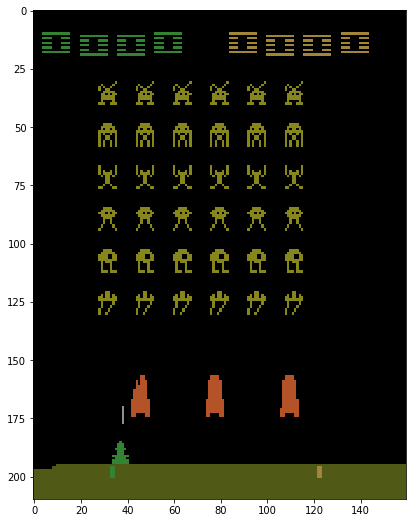

In [15]:
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('SpaceInvaders-v0')
env.reset()
plt.figure(figsize=(9,9))
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)
env.close()